* Clustering is grouping objects together based on similarity.
![](images/clustering_vs_classification.PNG)

* In classification error can be MSE, cross entropy loss
* Hard/Partition clustering: Each case can belong to 1 cluster
* Soft/Probabilistic clustering: Each cluster belongs to each cluster with some probability

### Distance

#### Eucledian distance:
* Direct distance
$$\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

#### Manhattan distance:

#### Distance between categorical attributes
* Distance is 0 if two records have same value
* 1 if different
* Sum the total distance across all attributes

#### Distance between Symmetric binary attributes Hamming Distance (Simple matching coefficient)
* Proportion of mismatches of their values
* Symmetric binary attributes has 2 values and both are equally important Ex. Gender
*
* Example
    - x_i = 111010010101
    - x_j = 110110110011
    - a = number of attributes with the value 1 for both data points
    - b = number of attributes with xi = 1 xj = 0
    - c = number of attributes with xi = 0 and xj = 1
    - d = number of attributes with with both value 0
    - Hamming distance = $\frac{b+c}{a+b+c+d}$

#### Jaccard coefficient (Distance between Asymmetric binary attributes)
* One of the states is more important or more valuable than the other
* Asymmetric binary attributes, 1 outcome are more important than other (has cancer, no cancer). No cancer are higher than cancer. Look for imbalance in available data, if large imbalance then asymmetric attribute.
* State 1 represent more important state, which typically the rare and infrequent state.

$dist = \frac{b+c}{a+b+c}$

* We have person 1 with 5 diseases and person 2 with other 5, out of total 10000.
* a = 0, b = 5 , c = 5, d = 9995
* Here hamming distance will be very small and not useful as it is dominated by d.
* In Walmart 2 customer are similar on which they have bought, not on they did not buy

#### Distance between ordinal variable
* Army ranking, education level
* Lookup matrix (Usually supplied by domain expert)
![](images/lookup_matrix.PNG)

### Clustering/Grouping/Segmentation
* Finding similar groups in the data called clusters.
    - Data instance similar to each other are in same cluster.
    - Data instance different to each other are in different cluster.

### Hierarchical Approach
* Create a hierarchical decomposition of the set of data using some criterion
* Useful with small size datasets.
* Agglomerative(bottom-up), divisive  (Top-down)

### Partitioning Approach
* Create sphere like clusters
* Construct various partition and then evaluate them by criterion.Eg. Minimize sum of the square error (K-means, Spectral clustering, K-median, Fuzzy c-means)
* Useful in medium and large size dataset

### Density based clustering
* Produce arbitrary shaped clusters
* DBSCAN
* Useful when there is a noise.

### Model-based methods
* We hypothesized for each cluster and tries to find best fit that model to each other. We want 2 cluster and try to find 2 gaussian fit on data. Ex Gaussian mixture model using EM(Expactation maximization)

## Hierarchical clustering
* We can compare 2 object using their least common ancestor in Dendrogram.
* Ex. Clustering documents in categories like
    - Arts (drawing)
    - Games (Video games, gambling)
    - Health (Fitness, medicine)
* No need to know the number of clusters a-priori. To get certain number of clusters we will cut the dendogram at specific level.

### Hierarchical Agglomerative Clustering(HAC)
* Agglomerative clustering assumes that each point is cluster individually and starts from bottom up.
* Each point is individually cluster by themselves.
* Merge them based on similarity.
* At each iteration pick 2 data points that have least distance between them. Add that point into cluster.
* How to define inter-cluster similarities?
    - Take min, max or average of both.
![](images/hierarchical.PNG)

* Assign each item to its own cluster, initially we have N items, you now have N clusters. Each containing just one item.
* Merge most similar cluster in single cluster, so now we have one less cluster
* Compute distance between new cluster and each old cluster
* Repeat step 2 and 3 until all item are clustered under 1 cluster of size N.

#### Inter cluster distance functions

##### Single-linkage (MIN)
    - Minimum distance, between any 2 points across clusters
    - Gives skewed dandogram(Gives clusters of varying size)
    - Can gibe elongated(stretched) cluster. Eats up more points.

##### Complete-linkage(MAX)
    - Maximum distance between any 2 points across clusters
    - Produces compact clusters

##### Average-linkage (AVG)
    - Avg distance between the points across the clusters
    - Gives balanced dandogram (To cluster of same size use it)
    
#### Ward's method
    - Default in sklearn
    - Minimize variance when merging 2 clusters.
    - To find distance between cluster A and B
        - Try to find central points of both clusters
        - Calculate distance between every point and central point, sum square of those
        - Subtract variance of each point (point - central point of cluster in which they are)
![](images/ward.PNG)
##### Centroid : 
    - Distance between the centroid of 2 clusters     
    - Points are (1,4), (3,2), (4,7), (1,2), mean of it is (1 + 3 + 4 + 1)/ 4 and (4+2+7+2)/4 is centroid
    - Susceptible to outliers
##### Medoid:
    - Distance between the medoids of 2 clusters
    - Medoid is centrally located object in the  (Ex. Median in 1 D, in higher D it is called Medoid)
    - Choose points and compute its distance from all other points, lease distance one is called medoid
    - Robust to outliers

* This algo is compute and space intensive

![](images/hierarchical1.PNG)

* Always generate the same clusters, Whereas in K-means it depends on initialization of centroids

In [45]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

In [46]:
clust = AgglomerativeClustering(n_clusters=3, linkage='ward') # linkeage can be ' “complete”, “average”, “single”
label = clust.fit_predict(load_iris().data[:10])

In [47]:
label

array([1, 0, 0, 0, 1, 2, 0, 1, 0, 0], dtype=int64)

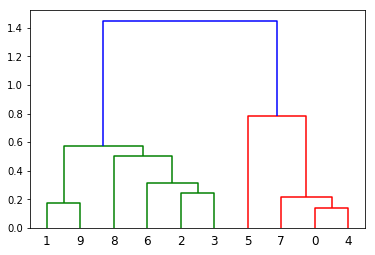

In [50]:
from scipy.cluster.hierarchy import dendrogram,ward,single
import matplotlib.pyplot as plt

linkage_matrix = ward(load_iris().data[:10])
dendrogram(linkage_matrix);

In [52]:
iris = load_iris()

In [62]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

In [63]:
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = avg.fit_predict(iris.data)

In [64]:
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_pred = complete.fit_predict(iris.data)

In [65]:
from sklearn.metrics import adjusted_rand_score

In [66]:
adjusted_rand_score(iris.target, ward_pred)

0.7311985567707745

In [67]:
adjusted_rand_score(iris.target, avg_pred)

0.7591987071071522

In [68]:
adjusted_rand_score(iris.target, complete_pred)

0.64225125183629

In [69]:
from sklearn.preprocessing import normalize

In [70]:
iris_norm = normalize(iris.data)

In [71]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris_norm)

In [72]:
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = avg.fit_predict(iris_norm)

In [73]:
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_pred = complete.fit_predict(iris_norm)

In [74]:
adjusted_rand_score(iris.target, ward_pred)

0.8856970310281228

In [75]:
adjusted_rand_score(iris.target, avg_pred)

0.5583714437541352

In [76]:
adjusted_rand_score(iris.target, complete_pred)

0.644447235392006

In [94]:
from scipy.cluster.hierarchy import linkage, fcluster

In [95]:
linkage_matrix = linkage(iris_norm, 'ward') # finds distance between intermediate clusters.

In [97]:
labels_iris = fcluster(linkage_matrix, 3, criterion='maxclust') # Generate clusters and assign associated cluster labels

In [98]:
labels_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

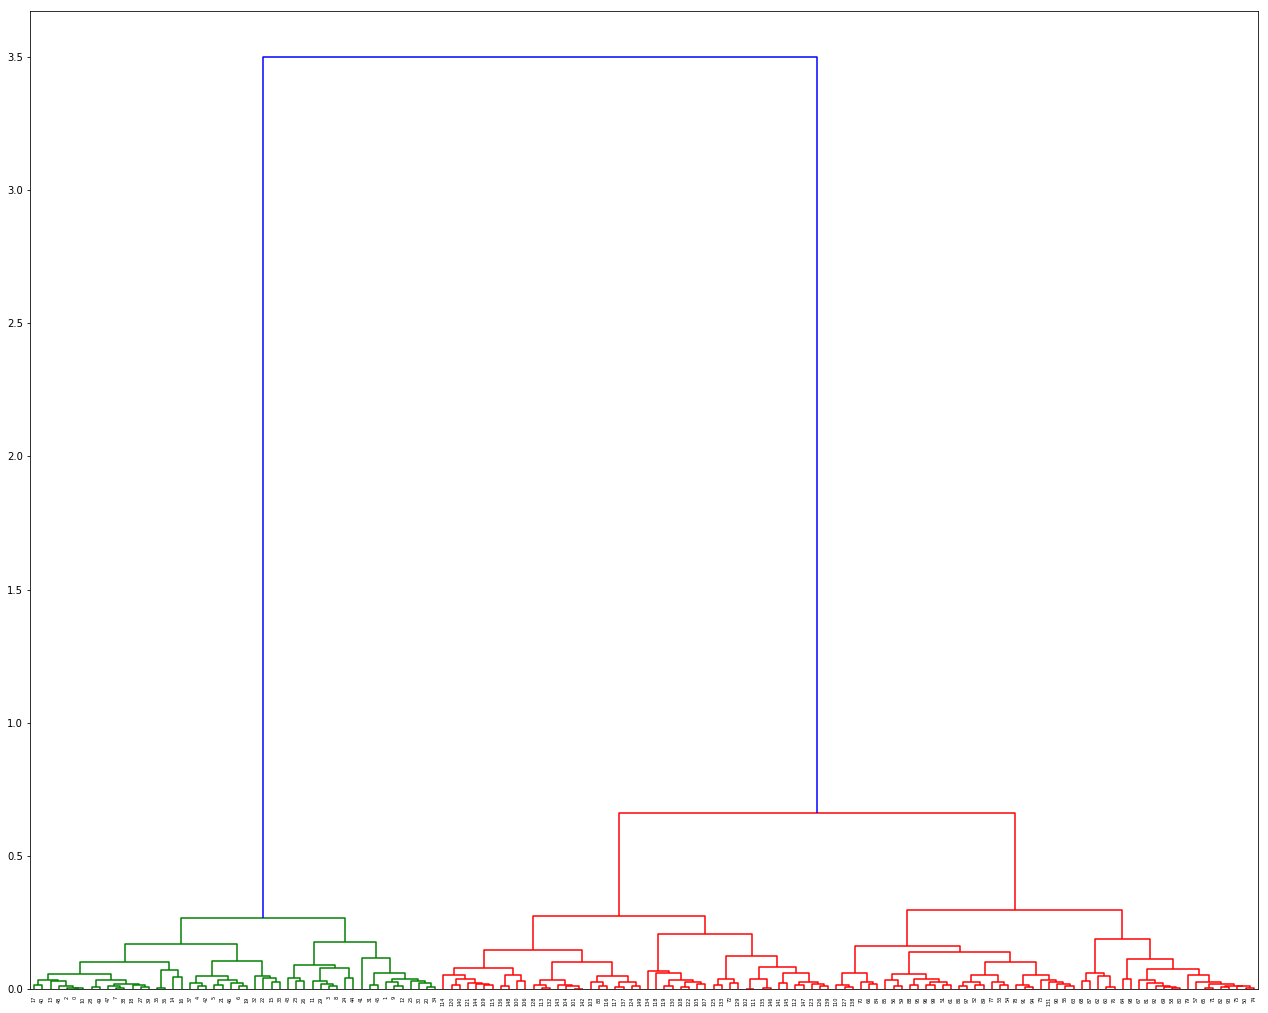

In [96]:
plt.figure(figsize=(22,18))
dendrogram(linkage_matrix);

* detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

In [100]:
from scipy.cluster.vq import kmeans, vq
centroid_iris = kmeans(iris_norm, 3)
labels_iris_kmeans, _ = vq(iris_norm, centroid_iris) 

ValueError: object arrays are not supported

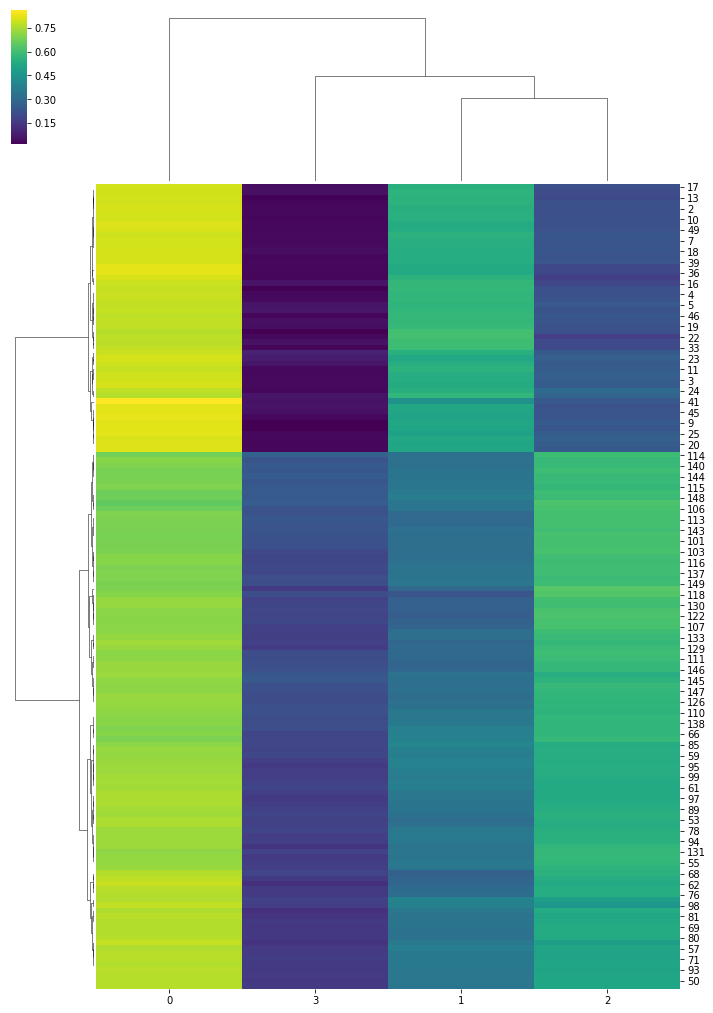

In [85]:
import seaborn as sns

sns.clustermap(iris_norm, figsize=(12,18), method='ward', cmap='viridis')

### K-Means Algorithm

* Hard clustering algo. Partition data into k clusters. Each cluster has cluster center called centroid.
* Starts with 2 random point for k = 2.
* Cluster assignment: Take each point and find distance between both points, assign to nearby clusters
* Now set 2 points to centroid of respective clusters.
* Again find distance with all points and allocate to near by cluster, iterate
* In short In iteration
    - Cluster assignment
    - Centroid update
* Here the main goal is to make compact cluster.
![](images/cluster_destortion.PNG)

* Optimizing Distortion function is NP hard so, we use iterative way.
* Assigning points to nearest centroid helps minimizing J
* Choosing Center of cluster as centroid also minimize J.

* If some point does not have points we can get rid of that point and left with k-1 clusters
* Or, we can re initialize that point if we need k clusters.

#### When we step?
* No re-assignment of data points to different clusters.
* No change of centroid
* Minimum change is sum of squared error (SSE)
    - Distortion function value is called SSE.
    - Think about we have some points at boundary, in 1 iteration is assigned to cluster a and in other cluster b. So use this criteria.
    - We call is SSE as ideally point should be on centroid but is is distorted around it.

* Feature variance also affect KMeans. Use `StandardScaler`.
* StandardScaler() (Z-score scaling) standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales (min-max scaling) each sample - here, each company's stock price - independently of the other.
* Normalizer is used to scale coloring of the image(this type of scaling transforms variable values to between 0 and 1.)
* In some cases it is useful to think of your data in terms of the percent they are as compared to the maximum value. In these cases, you will want to use MinMaxScaler.

#### Preventing Local Optima
* Good cluster can be decided by its compactness.
* We Randomly initialize K means
    - Run K means
    - Compute cost function
* Repeat above steps multiple times (50-1000 times)
* Choose clustering assignment with min J.

* K means are sensitive to outlier as it is based on centroid. Detect and remove outlier befor clustering.
* K-median/medoid are more robust to outliers
* Can not find arbitrary shaped clusters
    - K-mean try to find gaussian clusters, use kernel k-means which uses kernel tricks
* Only applicable to data where mean is well-defined
    - Restrict applicability to only euclidian spaces
    - If categorical attribute present, mean is not meaningful
* K initialization O(k)
* Cluster assignment O(nk)
* To compute centroid O(n)
* Total O(nkt) t = # of iterations.

#### K-Medoids
* Cluster has n_c data points we need O(n_c)2 to compute medoid.
* To make faster computation for medoid
    - We can compute the cenroid and make nearest point to the cenroid as medoid.
    - But it does not guarantee the medoid (particularly in outlier case)
![](images/k_mean_vs_hierarchical.PNG)

* K means is trying to minimize the sum of squared distances.
![](images/sum_of_squared_distance.PNG)
* Also it can be used to measure quality, lower is better.

#### How to initialize K
* K should be < m (training examples)
* Randomly pick K training examples and set it as a centroid.
* To avoid local optima, try having multiple initializations.

#### Right value of K
* Elbow method: (ELbow is a point where the max increase in the slope)
    - create a plot of the number of clusters (on the x-axis) vs. the average distance of the center of the cluster to each point (on the y-axis). This plot is called a scree plot.
    - The average distance will always decrease with each additional cluster center. However, with fewer clusters, those decreases will be more substantial. At some point, adding new clusters will no longer create a substantial decrease in the average distance. This point is known as the elbow.
    - Works some times
    ![](images/elbow.PNG)
* Figure out purpose, Clothing size S,M,L (3 clusters) vs XS, S,M,L,XL (5 Clusters) 
* Information criterion approach
* Analyzing the kernel matrix
* Gap statistics method
* Run 50-500 simulations for small K(2-10). For large K(100 or more) run 1-5 simulation. Pick one with best SSE.

#### Stability check of clusters
* Take random sample of 95% records. Compute clusters. If cluster formed are very similar to original, then clusters are fine. Otherwise run for more times.

### Cluster Quality
* External indices:
    - Label data available, compare with them
    - If labels are know, we can generate cross tabulation to check which labels are in which clusters.
    ![](images/external_indicies.PNG)
    ![](images/adjusted_rand_index.PNG)
    - adjusted Rand index does not care if the actual labels match. It only cares that the points that were in a cluster in the ground together remain in a cluster in the clustering result -- regardless of whether the clustering algorithm gives this cluster the label '0' or '1'
* Internal Indices
    - Label data not available
    - Measure how spread out the clusters are(lower is better)
    - Distance from each sample to centroid of its cluster.
    - Separability: 
    ![](images/internal_indicies.PNG)
    ![](images/silhouette.PNG)
    - It works well to identify compact, good separable cluster. It does not reward to find good shape like nested ring. So for DBSCAN sihouette score is not useful.

* K-Means always try to find circular, spherical or hyper-spherical clusters

### Gaussian Mixture model
* Soft clustering algo
* Each point has different level of membership in each clusters.
* It assumes that each cluster follows certain statistical distribution.
![](images/gaussian_mixture.PNG)

### Soft(Fuzzy) Clustering (EM algorithm)
* Data points can be assigned to multiple clusters.
* Document clustering
    - A document about politics in BCCI belongs to both politics and sports
* Handwriting Recognition
    - P(8) = 0.58 and P(3) = 0.42
* EM represent not only represent by centroid but also by Gauassian (Variance).
    - In cluster assignment, compute distance from centroid and calculate variance from centroid. So we can compute probability.
    - Having multiple gaussian it is called gaussian mixture model.
    - Update centroid as well as variance of clusters(gaussians)
1. Initialize K Gaussian distributions.
    - Initialize mean and variance of K Gaussian distribution. Other method is to run K-means and use cluster to find mean and variance.
2. Soft-cluster data "Expectation"
    - Find membership of each point in each Gaussian.
    ![](images/expectation.PNG)
3. Re-estimate the Gaussian parameters "Maximization"
    ![](images/maximization.PNG)
4. Evaluate log-likelihood to check for convergence
    - We want higher value, We will be sure that mixture model we generated fits the data.
    ![](images/log_likelihood.PNG)
* Repeat from step 2 until converged.

In [92]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(iris.data)
gmm.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

* Soft-clustering (Sample membership of multiple clusters)
* Cluster shape flexibility
* Sensitive to initialization values
* Possible to converge to local optimum
* Slow convergence rate

### Density based clustering
* Choose point randomly, expand cluster from that point. Check nearby points, if it is not too far include in my current cluster. If no such point, current cluster is done. Choose other point outside the created cluster and make new cluster.
* Useful to discover arbitrary shaped clusters.

#### DBSCAN (Density based spatial clustering for application with noise)
* Groups together points that are closely packed together
* Not every point is part of the cluster, it is marked as noise.
* Choose point randomly, we pass search distance epsilon, to search around that point, if there are no point, chosen point is noise.
* If no more points in epsilon distance, if total number of points in current cluster is less than minimum number of points, if not then all points in that cluster are noise.
* A point from which we can emerge cluster is called core points, all other points are border points.
![](images/DBSCAN_k_mean.PNG)
* No need to specify number of cluster
* Flexibility in shapes and size of clusters
* Deals with noise and outliers
* K-means assign all points to a cluster even if they do not belong in any, DBSCAN locates regions of high density and separates outliers

In [86]:
from sklearn.cluster import DBSCAN

In [87]:
db = DBSCAN(eps=0.5, min_samples=5)

In [90]:
db.fit(iris.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [91]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

* -1 are noise, 0,1,2,... are clusters

### Spectral clustering
* Powerful in discovering non-convex clusters

### Constraint based clustering
* Constraint like A and B points should be in same cluster or not be in same cluster.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

(-15, 15)

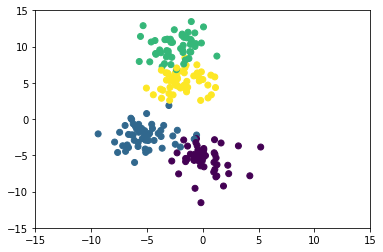

In [18]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
points = data[0]
plt.scatter(points[:,0], points[:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) # init = "k-means++" means selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# n_init : Number of time the k-means algorithm will be run with different centroid seeds.
# The final results will be the best output of n_init consecutive runs in terms of inertia.
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

* How k-means++ works
    - Choose first cluster center uniformly at random from data points
    - For each observation x, compute distance from nearest cluster center
    - Choose new cluster center from amongst data points with probability of x being chosen proportional to distance(x)^2. We choose point that is far from available cluster centers.
    - Repeat 2 and 3 until k centers have been chosen.
    ![](images/k_means_plus.PNG)

In [20]:
kmeans.cluster_centers_

array([[-1.92101646,  5.21673484],
       [ 0.05161133, -5.35489826],
       [-2.40167949, 10.17352695],
       [-5.56465793, -2.34988939]])

In [21]:
y_km = kmeans.fit_predict(points)

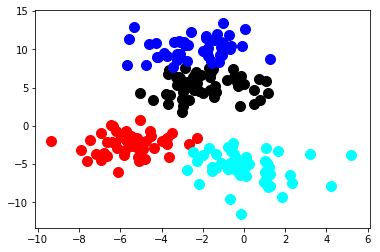

In [22]:
plt.scatter(points[y_km==0,0], points[y_km==0,1], s=100,c='red')
plt.scatter(points[y_km==1,0], points[y_km==1,1], s=100,c='black')
plt.scatter(points[y_km==2,0], points[y_km==2,1], s=100,c='blue')
plt.scatter(points[y_km==3,0], points[y_km==3,1], s=100,c='cyan')

#### Elbow (Scree Plot)

In [30]:
import pandas as pd

In [31]:
votes = pd.read_csv("data/114_congress.csv")

In [33]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [32]:
kmeans = KMeans(n_clusters=2, random_state=1)

In [36]:
senator_distances = kmeans.fit_transform(votes.iloc[:,3:])

In [39]:
senator_distances[:5] # Distance for each senator from both clusters

array([[3.12141628, 1.3134775 ],
       [2.6146248 , 2.05339992],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [1.43833966, 2.96866004]])

In [40]:
pd.crosstab(votes['party'], kmeans.labels_)

col_0,0,1
party,,
D,41,3
I,2,0
R,0,54


* It looks like both of our clusters mostly broke down along party lines. The first cluster contains 41 Democrats, and both Independents. The second cluster contains 3 Democrats, and 54 Republicans.

* No Republicans seem to have broken party ranks to vote with the Democrats, but 3 Democrats are more similar to Republicans in their voting than their own party.

In [42]:
democratic_outliers = votes[(kmeans.labels_ == 1) & (votes.party == "D")]

In [43]:
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()

In [25]:
digits.data.shape

(1797, 64)

In [26]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [27]:
clusters = kmeans.fit_predict(digits.data)

In [28]:
kmeans.cluster_centers_.shape

(10, 64)

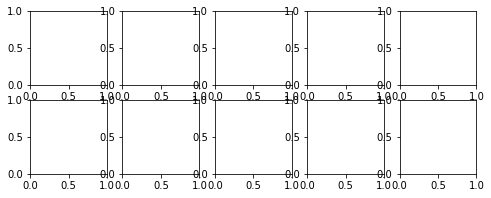

In [29]:
fig,ax = plt.subplots(2,5,figsize=(8,3))

### Map-Reduce with K-Means
* In Map phase, given a cluster center I can assign data points to that cluster independently of other points. Mapper emits (cluster label, data points)
* Reduce Phase average over all points in cluster j. It will emit (cluster label, new centroid)
* Requires iterative version